#### Name: Sourasish Basu, Section: CSE-6, Roll: 22051636

## Building a Decision Tree Classifier Model for binary classification using Cars - Purchase Decision Dataset


![image](https://storage.googleapis.com/kaggle-datasets-images/2329085/3922215/f94e223179f0178732f235a200670438/dataset-cover.jpg?t=2022-07-09-13-44-26)

### Algorithm

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

### Usage

#### Libraries:
- matplotlib
- pandas
- numpy
- scikit-learn
- seaborn

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Importing Dataset

In [87]:
data = pd.read_csv("datasets/car_data.csv")

# Check for missing values and basic stats
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [88]:
data.head()

 # Purchase Decision (No = 0; Yes = 1)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### Inspecting Dataset

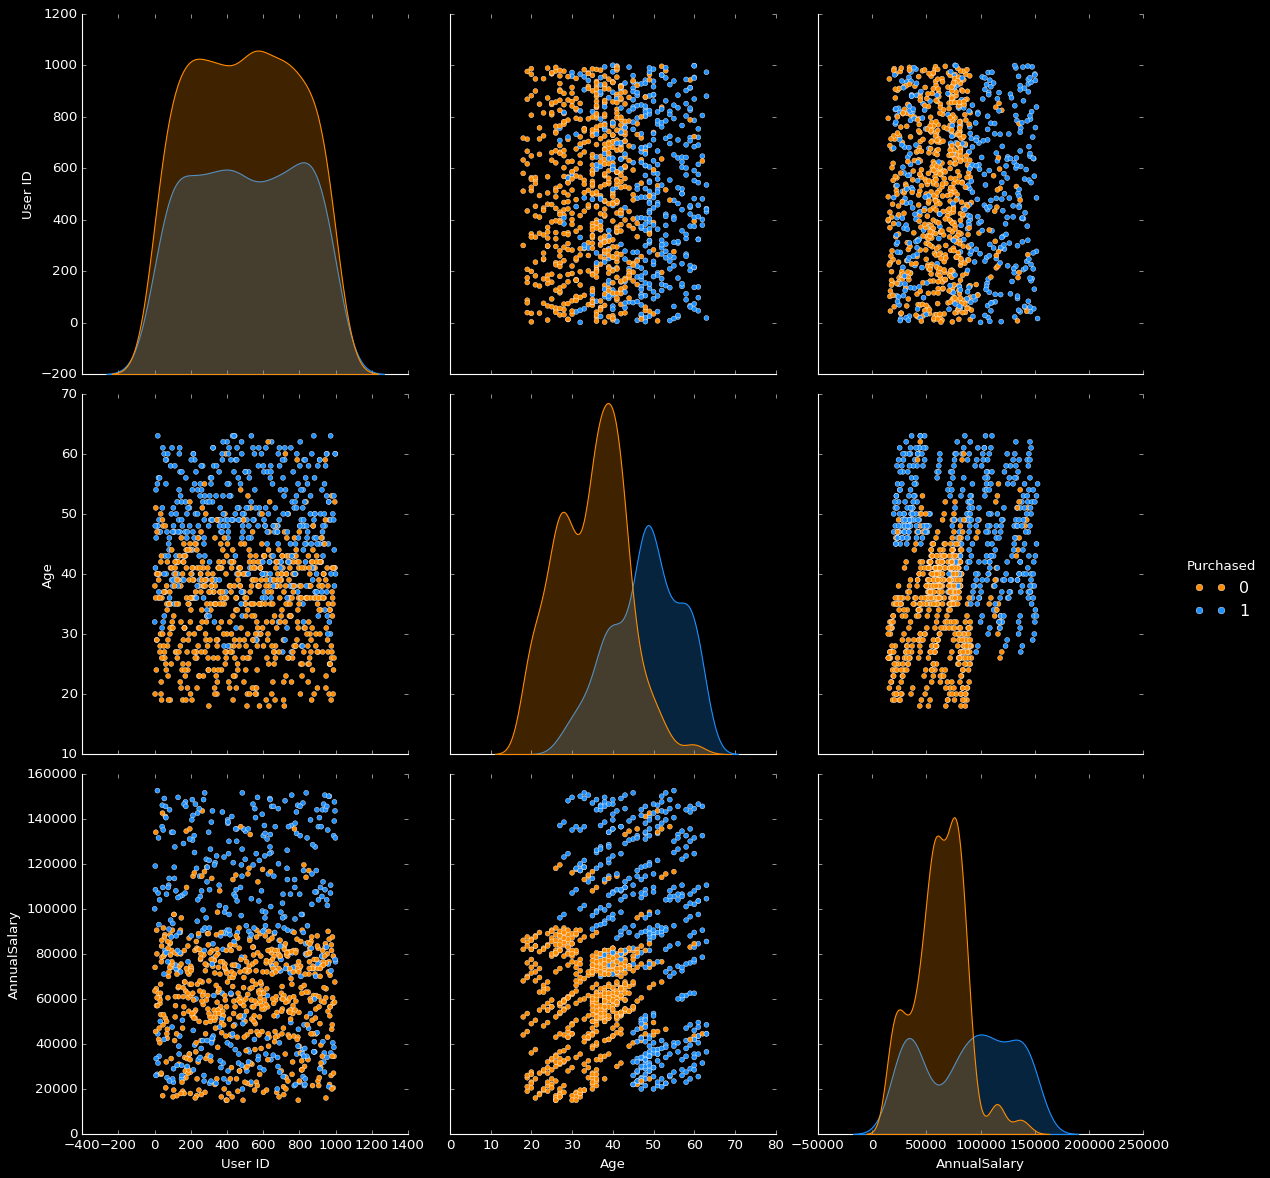

In [89]:
plt.style.use('dark_background')
# Visualize the data distribution
sns.pairplot(data, hue='Purchased', palette=['darkorange', 'dodgerblue'], height=5)
plt.show()

# Transforming Categorical variable 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

### Feature Selection via Correlation Heatmap

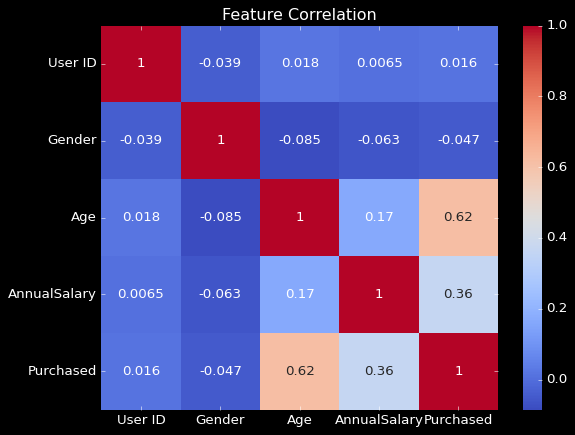

In [90]:
# Plotting correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

### Data Preprocessing

In [91]:
# Dropping the 'User ID' column since these don't control predictions
data = data.drop(columns=['User ID'], axis=1)

# Defining features and target
X = data[['Gender', 'Age', 'AnnualSalary']]
y = data['Purchased']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [92]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=2)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

### Model Evaluation

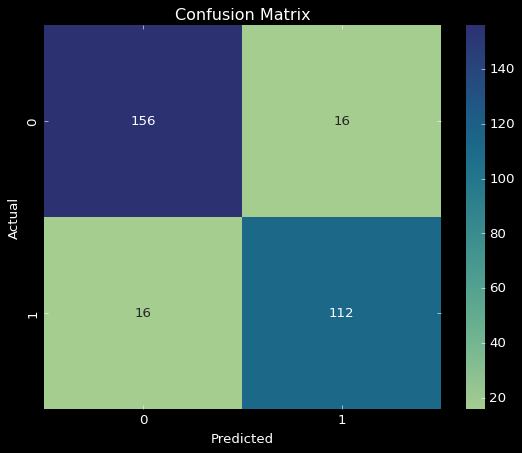

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       172
           1       0.88      0.88      0.88       128

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy: 0.89


In [93]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

### K-Fold Cross Validation

In [94]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precisions = cross_val_score(model, X, y, cv=kf, scoring='precision')
recalls = cross_val_score(model, X, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')

print(f"Average Accuracy: {np.mean(accuracies)}")
print(f"Average Precision: {np.mean(precisions)}")
print(f"Average Recall: {np.mean(recalls)}")
print(f"Average F1-Score: {np.mean(f1_scores)}")

Average Accuracy: 0.898
Average Precision: 0.8311500446657764
Average Recall: 0.9349674625178462
Average F1-Score: 0.8796827862864369


### Calculating Entropy for Root Node

In [95]:
def calculate_entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate entropy for the target and each feature
target_entropy = calculate_entropy(y)
feature_entropies = {col: calculate_entropy(X[col]) for col in X.columns}

print(f"Target Entropy: {target_entropy}")
print("Feature Entropies:")
for feature, entropy in feature_entropies.items():
    print(f"{feature}: {entropy}")

Target Entropy: 0.972108503637691
Feature Entropies:
Gender: 0.9992612140227841
Age: 5.338895593210101
AnnualSalary: 7.628871268096669


### Visualizing the Decision Tree

[Text(0.5, 0.8333333333333334, 'Age <= 0.518\nentropy = 0.966\nsamples = 700\nvalue = [426, 274]\nclass = Not Purchased'),
 Text(0.25, 0.5, 'AnnualSalary <= 0.556\nentropy = 0.702\nsamples = 484\nvalue = [392, 92]\nclass = Not Purchased'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.245\nsamples = 394\nvalue = [378.0, 16.0]\nclass = Not Purchased'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.624\nsamples = 90\nvalue = [14, 76]\nclass = Purchased'),
 Text(0.75, 0.5, 'AnnualSalary <= -0.921\nentropy = 0.628\nsamples = 216\nvalue = [34, 182]\nclass = Purchased'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.116\nsamples = 64\nvalue = [1, 63]\nclass = Purchased'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.755\nsamples = 152\nvalue = [33, 119]\nclass = Purchased')]

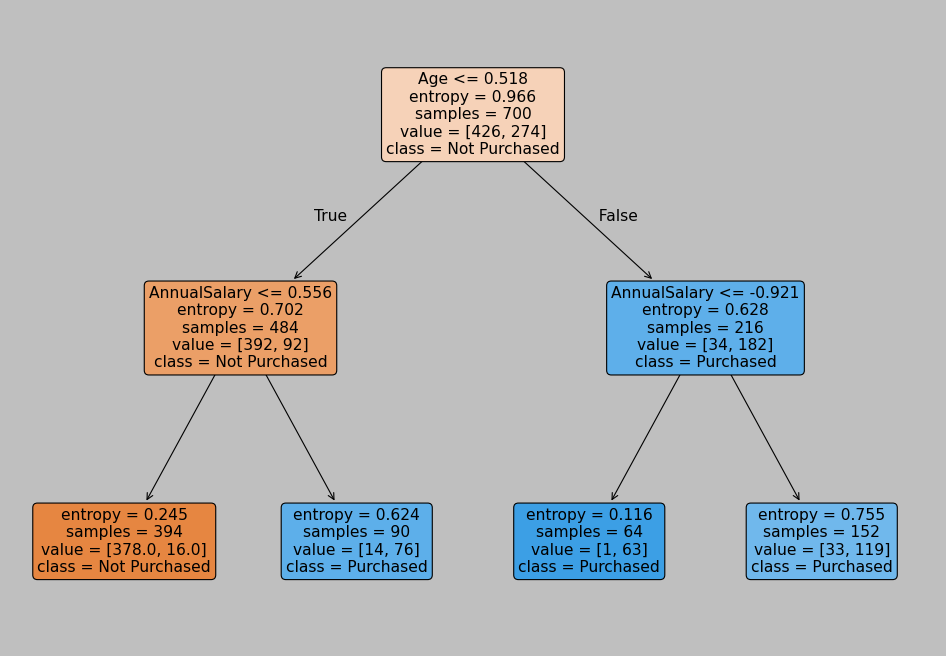

In [96]:
# Plot the decision tree
plt.style.use('classic')
plt.figure(figsize=(15,10))
plt.title("Decision tree trained on all car purchase decision features")
graph = plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    fontsize=14,
    
)

# Render the decision tree
graph

### Plotting Decision Boundary

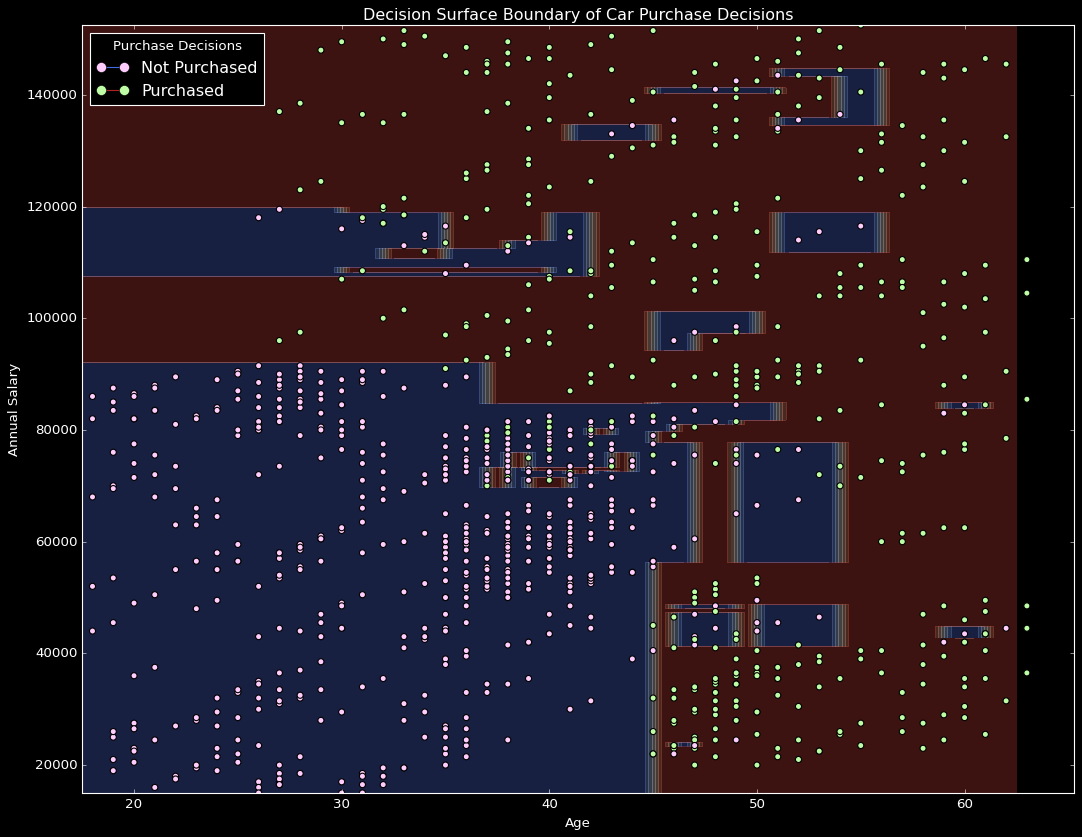

In [97]:
# Training for 2 most important features to fine Decision Surface Boundary
X = data[['Age', 'AnnualSalary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Plotting the data points
plt.style.use('dark_background')
plt.figure(figsize=(16, 12))

# Generating meshgrid for the decision boundary
x_min, x_max = X.values[:, 0].min() - 0.5, X.values[:, 0].max() + 0.5
y_min, y_max = X.values[:, 1].min() - 0.5, X.values[:, 1].max() + 0.5

# Increased step size to reduce the resolution
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 1),
    np.arange(y_min, y_max, 1)
)

# Converting meshgrid to Dataframe to predict with model
meshgrid_points = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=['Age', 'AnnualSalary']
)

# Predict on meshgrid points
grid_points = scaler.transform(meshgrid_points)
Z = model.predict(grid_points)  # Predict classes for each grid point
Z = Z.reshape(xx.shape)  # Reshape predictions to match the meshgrid

# Plot the decision surface boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
scatter = plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=plt.cm.vanimo, edgecolors='black', s=30)

# Fixing legend
handles = [
    plt.Line2D([0], [0], marker='o', color='royalblue', markerfacecolor=plt.cm.vanimo(0), markersize=9, label="Not Purchased"),
    plt.Line2D([0], [0], marker='o', color='firebrick', markerfacecolor=plt.cm.vanimo(255), markersize=9, label="Purchased")
]
plt.legend(handles=handles, title="Purchase Decisions", loc="upper left")
plt.title("Decision Surface Boundary of Car Purchase Decisions")
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.grid(False)
plt.show()